In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df=pd.read_csv("Booking.csv")

In [3]:
#display the dataset
df.head()

,Date,Time,Booking_ID,Booking_Status,Customer_ID,Vehicle_Type,Pickup_Location,Drop_Location,Avg_VTAT,Avg_CTAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Incomplete_Rides_Reason,Booking_Value,Payment_Method,Ride_Distance,Driver_Ratings,Customer_Rating
0,2023-12-06,22:45:50,BKG0000001,Canceled,CUST5411,Bike,Location_3,Location_16,17.33,10.37,1,0,1,Other,344.96,UPI,14.50,3,5
1,2023-12-27,19:38:35,BKG0000002,Canceled,CUST4725,Auto,Location_27,Location_37,11.54,8.47,0,0,1,Customer No-show,977.02,Card,7.38,5,5
2,2023-12-21,16:09:58,BKG0000003,Completed,CUST8190,Auto,Location_13,Location_33,12.87,9.90,0,1,1,Driver No-show,630.58,Wallet,37.26,4,3
3,2023-12-29,01:00:14,BKG0000004,Canceled,CUST2194,SUV,Location_19,Location_28,11.30,18.57,1,0,1,Technical Issue,487.81,UPI,44.36,2,2
4,2023-12-03,05:22:05,BKG0000005,Completed,CUST3920,Bike,Location_27,Location_6,15.73,5.93,0,1,1,Other,106.51,Cash,28.47,1,2


In [4]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Date                        100000 non-null  object 
 1   Time                        100000 non-null  object 
 2   Booking_ID                  100000 non-null  object 
 3   Booking_Status              100000 non-null  object 
 4   Customer_ID                 100000 non-null  object 
 5   Vehicle_Type                100000 non-null  object 
 6   Pickup_Location             100000 non-null  object 
 7   Drop_Location               100000 non-null  object 
 8   Avg_VTAT                    100000 non-null  float64
 9   Avg_CTAT                    100000 non-null  float64
 10  Canceled_Rides_by_Customer  100000 non-null  int64  
 11  Canceled_Rides_by_Driver    100000 non-null  int64  
 12  Incomplete_Rides            100000 non-null  int64  
 13  Incomplete_Ride

In [40]:
# check for missing value
df.isnull().sum()

Date                          0
Time                          0
Booking_ID                    0
Booking_Status                0
Customer_ID                   0
Vehicle_Type                  0
Pickup_Location               0
Drop_Location                 0
Avg_VTAT                      0
Avg_CTAT                      0
Canceled_Rides_by_Customer    0
Canceled_Rides_by_Driver      0
Incomplete_Rides              0
Incomplete_Rides_Reason       0
Booking_Value                 0
Payment_Method                0
Ride_Distance                 0
Driver_Ratings                0
Customer_Rating               0
dtype: int64

In [7]:
df.describe()

,Avg_VTAT,Avg_CTAT,Canceled_Rides_by_Customer,Canceled_Rides_by_Driver,Incomplete_Rides,Booking_Value,Ride_Distance,Driver_Ratings,Customer_Rating
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000
mean,17.525779,14.99511,0.501340,0.503150,0.50168,525.642484,25.592678,2.998770,2.991880
std,7.220623,5.77784,0.500001,0.499993,0.50000,273.789599,14.146237,1.416139,1.417757
min,5.000000,5.00000,0.000000,0.000000,0.00000,50.010000,1.000000,1.000000,1.000000
25%,11.290000,9.99000,0.000000,0.000000,0.00000,289.577500,13.350000,2.000000,2.000000
50%,17.520000,14.98000,1.000000,1.000000,1.00000,526.480000,25.620000,3.000000,3.000000
75%,23.770000,20.01000,1.000000,1.000000,1.00000,762.640000,37.870000,4.000000,4.000000
max,30.000000,25.00000,1.000000,1.000000,1.00000,999.980000,50.000000,5.000000,5.000000


In [8]:
df.shape

(100000, 19)

In [9]:
df.dtypes

Date                           object
Time                           object
Booking_ID                     object
Booking_Status                 object
Customer_ID                    object
Vehicle_Type                   object
Pickup_Location                object
Drop_Location                  object
Avg_VTAT                      float64
Avg_CTAT                      float64
Canceled_Rides_by_Customer      int64
Canceled_Rides_by_Driver        int64
Incomplete_Rides                int64
Incomplete_Rides_Reason        object
Booking_Value                 float64
Payment_Method                 object
Ride_Distance                 float64
Driver_Ratings                  int64
Customer_Rating                 int64
dtype: object

In [3]:
# How many total rides are there?
total_rides=len(df)
print("Total Rides:",total_rides)

Total Rides: 100000


In [8]:
# how many rides were complete?
completed_rides = len(df[df['Booking_Status'] == 'Completed'])
print("Completed Rides:", completed_rides)

Completed Rides: 33125


In [14]:
#which vehicale type is the most populer?
most_popular_vehicle=df['Vehicle_Type'].value_counts().idxmax()
print("Most popular Vehicle Type:", most_popular_vehicle)

Most popular Vehicle Type: Bike


In [15]:
#what is the most common payment method?
most_common_payment=df['Payment_Method'].value_counts().idxmax()
print("Most Common payment Method:",most_common_payment)

Most Common payment Method: UPI


In [17]:
#what is the average booking value?
average_booking_value=df['Booking_Value'].mean()
print("Average Booking Value:", round(average_booking_value,2))

Average Booking Value: 525.64


In [18]:
#what is the highest and lowest ride distance?
max_distance=df['Ride_Distance'].max()
min_distance=df['Ride_Distance'].min()
print("Highest Ride Distance: ",max_distance)
print("Lowest Ride Distance: ",min_distance)

Highest Ride Distance:  50.0
Lowest Ride Distance:  1.0


In [19]:
#what is the average driver rating?
average_driver_rating=df['Driver_Ratings'].mean()
print("Average Driver rating:",round(average_driver_rating))

Average Driver rating: 3


In [20]:
#which pickup location has the most rides?
most_popular_pickup=df['Pickup_Location'].value_counts().idxmax()
print("Most Popular Pickup Location:",most_popular_pickup )

Most Popular Pickup Location: Location_48


In [21]:
#how many rides were completed,canceled, and incompleted 
ride_status_counts=df['Booking_Status']. value_counts()
print("Ride Status Counts:\n", ride_status_counts)

Ride Status Counts:
 Incomplete    33503
Canceled      33372
Completed     33125
Name: Booking_Status, dtype: int64


In [26]:
#what is the total revenue generated from completed rides?
total_revenue=df[df['Booking_Status']=='Completed']['Booking_Value'].sum()
print("Total Revenue from Completed Rides:",total_revenue)

Total Revenue from Completed Rides: 17394080.269999996


In [30]:
#what is the average ride distance for each vehicle type?
avg_distance_per_vehicle = df.groupby('Vehicle_Type')['Ride_Distance'].mean().sort_values(ascending=False)
print("Average Ride Distance per Vehicle Type:\n", avg_distance_per_vehicle)

Average Ride Distance per Vehicle Type:
 Vehicle_Type
Bike    25.635602
Car     25.621746
Auto    25.574039
SUV     25.539417
Name: Ride_Distance, dtype: float64


In [46]:
#what percentage of boooking were canceled?
canceled_percentage = (len(df[df['Booking_Status'] == 'Canceled']) / len(df)) * 100
print(f"Percentage of Canceled Bookings: {canceled_percentage:.2f}%")

Percentage of Canceled Bookings: 33.37%


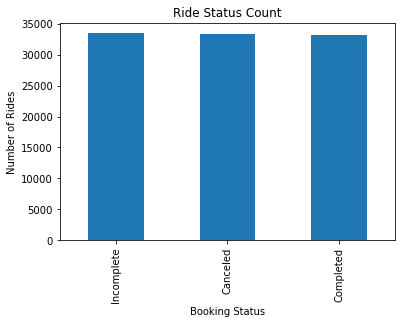

In [8]:
#Count of Rides by Status (Bar Chart)
import matplotlib.pyplot as plt

df['Booking_Status'].value_counts().plot(kind='bar')

plt.title('Ride Status Count')
plt.xlabel('Booking Status')
plt.ylabel('Number of Rides')
plt.show()

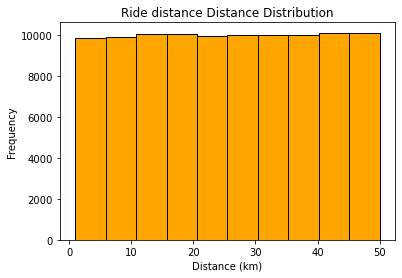

In [12]:
#Ride Distance Distribution(Histogram)
df['Ride_Distance'].plot(kind='hist',bins=10,color='',edgecolor='black')
plt.title('Ride distance Distance Distribution')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

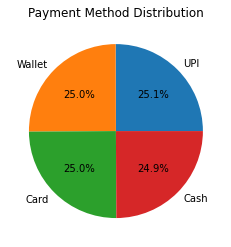

In [13]:
#Payment Method Usagr(Pie Chart)
df['Payment_Method'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.ylabel('')
plt.show()

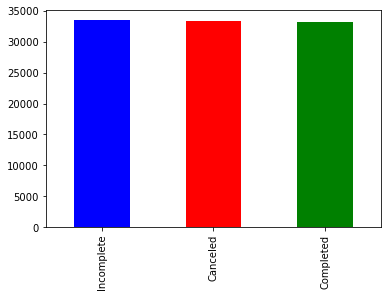

In [8]:
#bar chart booking status count
df["Booking_Status"].value_counts().plot(kind="bar",color=["blue","red","green"])
plt.show()

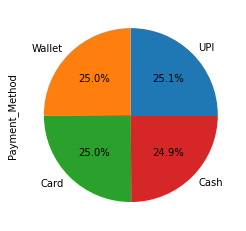

In [11]:
#pie chart-payment method distribution
df[ "Payment_Method"].value_counts().plot(kind="pie",autopct="%1.1f%%")
plt.show()

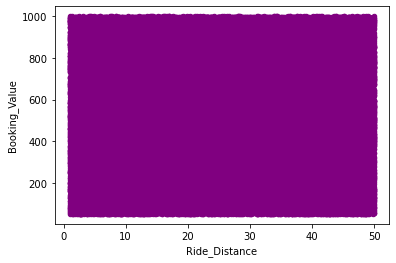

In [15]:
#Scatter Plot - Ride Distance vs Booking Value
df.plot(x="Ride_Distance", y="Booking_Value", kind="scatter", color="purple")
plt.show()

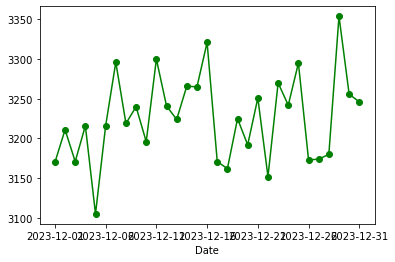

In [16]:
#Linechart-Daily Booking Trends
df.groupby("Date").size().plot(kind="line",marker="o",color="green")
plt.show()

In [4]:
import os
print(os.getcwd())


C:\Users\Lenovo\Untitled Folder 9


In [5]:
df.to_csv("Clean_Booking.csv", index=False)

In [8]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pyodbc

In [2]:
conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-75VEL8U\\SQLEXPRESS;"
    
    "Database=OLARIDEBOOKING_ANALYSIS;"
    "Trusted_connection=yes;"
)

cursor = conn.cursor()

cursor.execute("Select * from Booking")
rows = cursor.fetchall()

print(rows)



NameError: name 'pyodbc' is not defined

In [15]:
import pyodbc

conn = pyodbc.connect(
    "Driver={ODBC Driver 17 for SQL Server};"
    "Server=DESKTOP-75VEL8U\\SQLEXPRESS;"
    "Database=OLARIDEBOOKING_ANALYSIS;"
    "Trusted_Connection=yes;"
)
cursor = conn.cursor()

cursor.execute("Select * from Booking")
rows = cursor.fetchall()
print(rows)

[(datetime.date(2023, 12, 6), datetime.time(22, 45, 50), 'BKG0000001', 'Canceled', 'CUST5411', 'Bike', 'Location_3', 'Location_16', 17.329999923706055, 10.369999885559082, True, False, True, 'Other', 344.9599914550781, 'UPI', 14.5, 3, 5), (datetime.date(2023, 12, 27), datetime.time(19, 38, 35), 'BKG0000002', 'Canceled', 'CUST4725', 'Auto', 'Location_27', 'Location_37', 11.539999961853027, 8.470000267028809, False, False, True, 'Customer No-show', 977.02001953125, 'Card', 7.380000114440918, 5, 5), (datetime.date(2023, 12, 21), datetime.time(16, 9, 58), 'BKG0000003', 'Completed', 'CUST8190', 'Auto', 'Location_13', 'Location_33', 12.869999885559082, 9.899999618530273, False, True, True, 'Driver No-show', 630.5800170898438, 'Wallet', 37.2599983215332, 4, 3), (datetime.date(2023, 12, 29), datetime.time(1, 0, 14), 'BKG0000004', 'Canceled', 'CUST2194', 'SUV', 'Location_19', 'Location_28', 11.300000190734863, 18.56999969482422, True, False, True, 'Technical Issue', 487.80999755859375, 'UPI', 4

In [16]:
cursor = conn.cursor()
cursor.execute("select count(Distinct Customer_ID)as Unique_Customers from Booking")
rows = cursor.fetchall()
print(rows)

[(938, )]


In [4]:
df.to_csv("Clean_Booking", index=False)